In [92]:
import pandas as pd
import numpy as np
df=pd.read_csv("A8.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [96]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
import numpy as np

#according to my knowledge (Glucose, BloodPressure , SkinThickness, Insulin, BMI )
#those zeros are invalid

zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
(df[zero_columns] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [98]:
for col in zero_columns:
    median = df[col].median()
    df[col] = df[col].replace(0, median)
    
(df[zero_columns] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [100]:
# X and Y variables

X=df.drop(columns=['Outcome'])
Y=df['Outcome']


In [101]:
#Standard Scalar(Data Transformation)
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

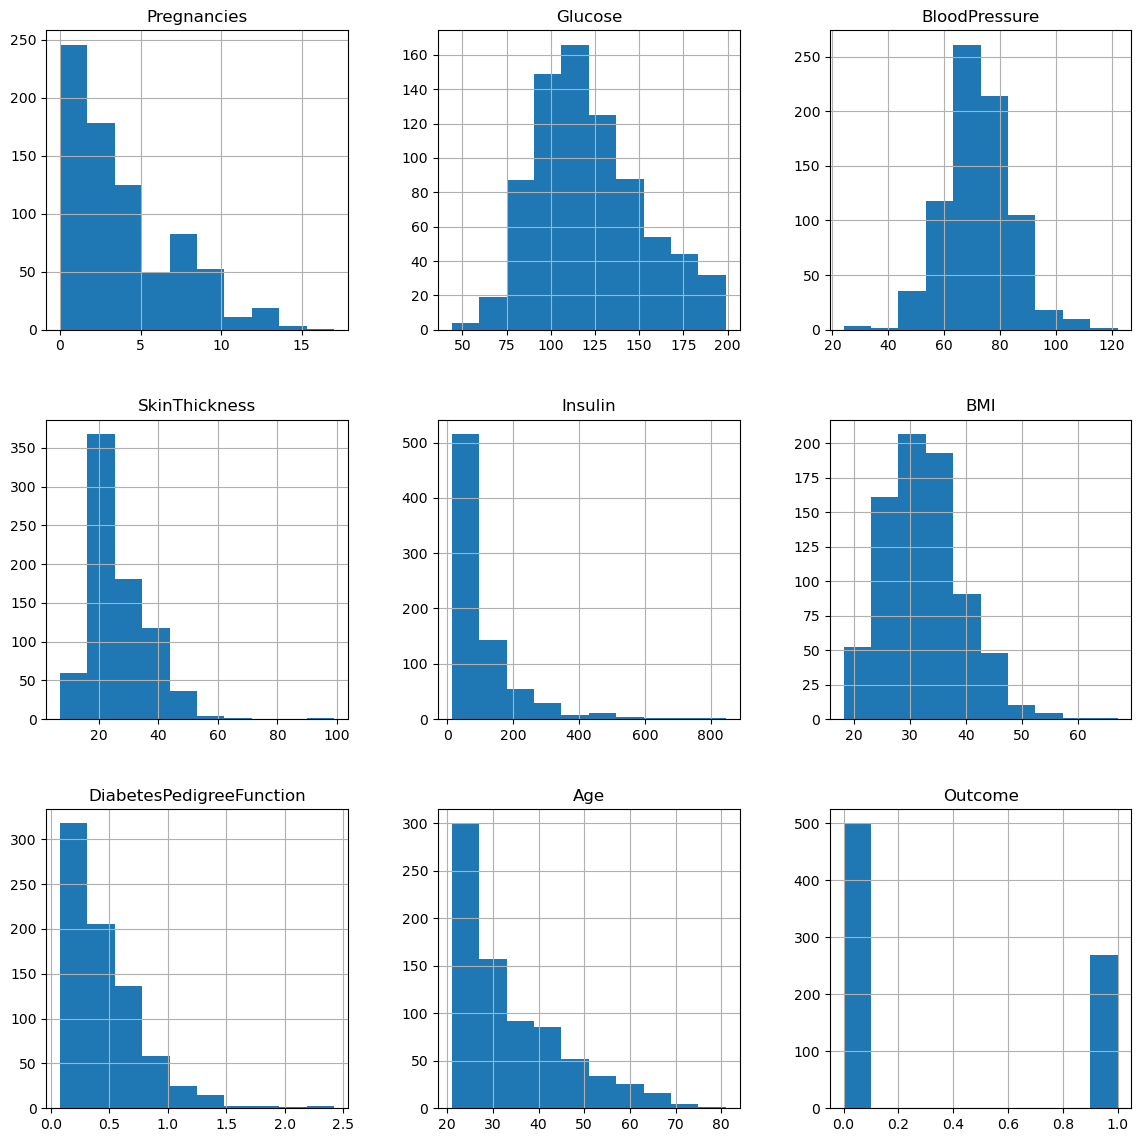

In [107]:
df.hist(figsize=(14,14))

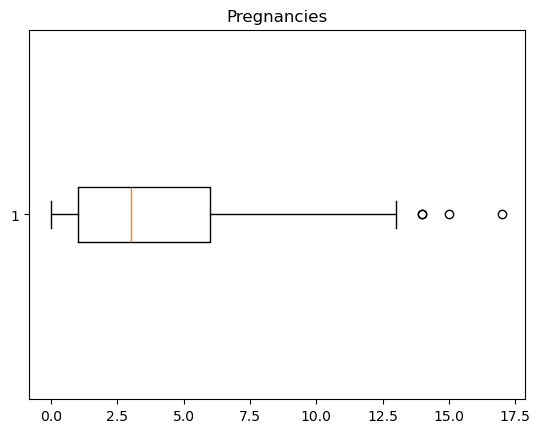

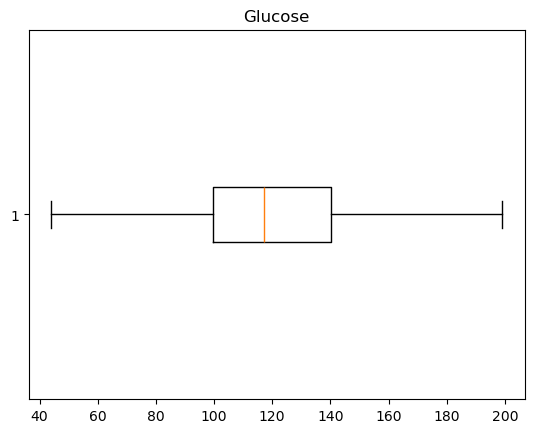

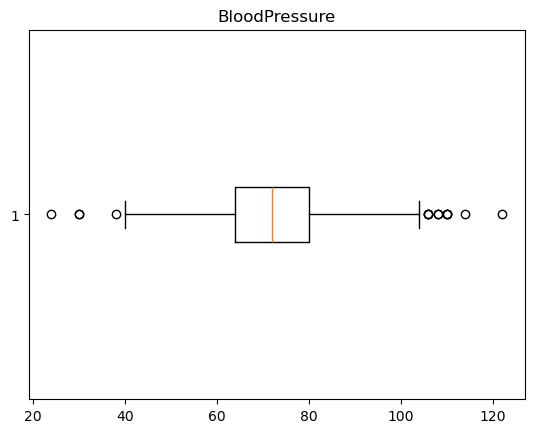

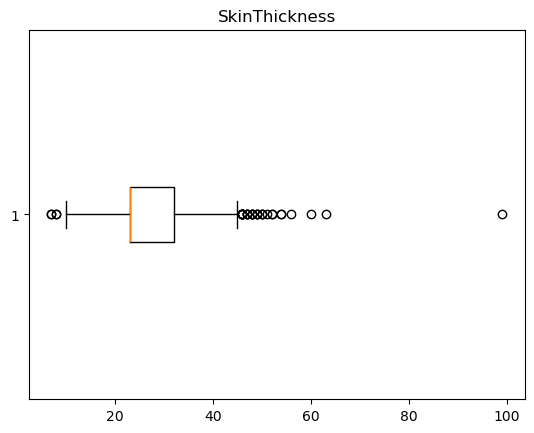

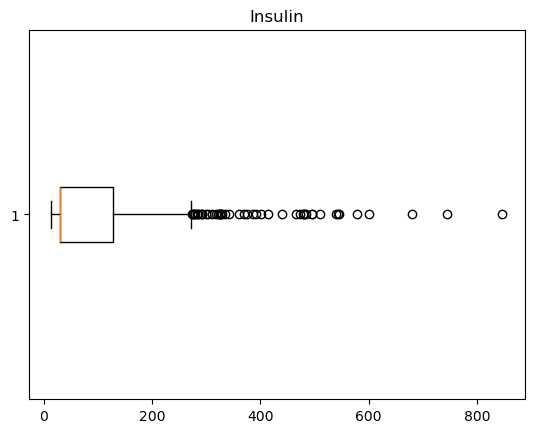

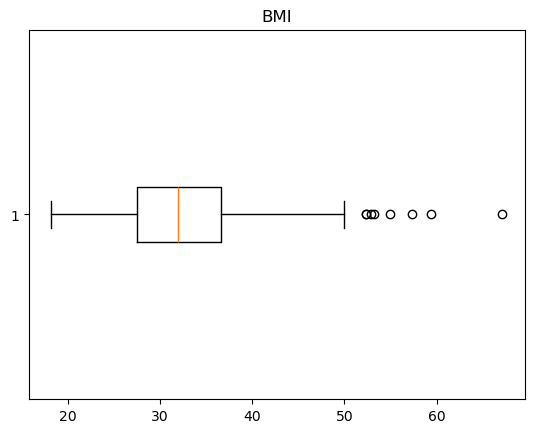

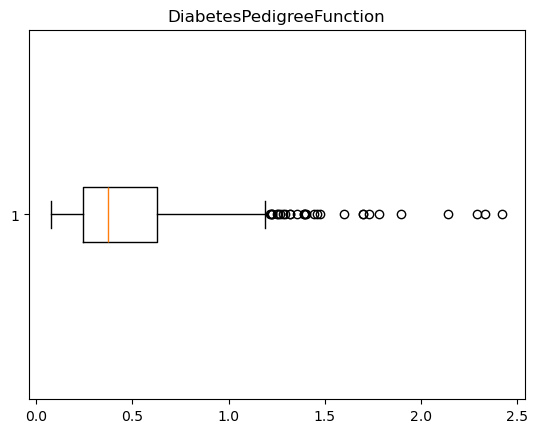

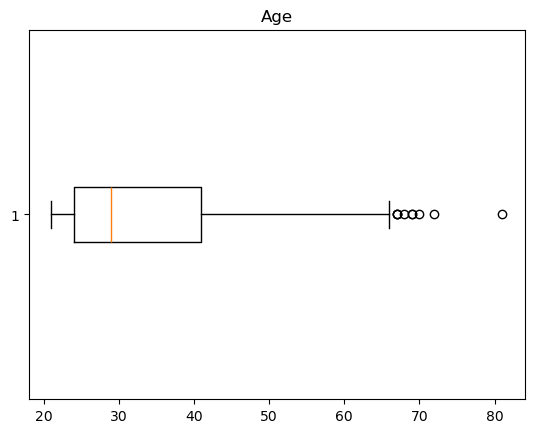

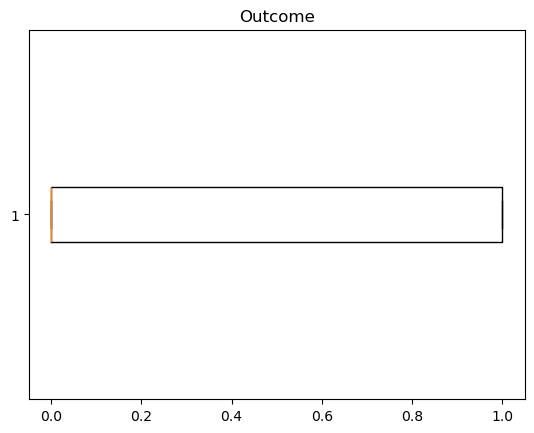

In [108]:
import matplotlib.pyplot as plt
for col in df.columns:
    plt.boxplot(df[col],vert=False)
    plt.title(col)
    plt.show()

In [109]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.20,random_state=100)

In [110]:
# fit the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
model.fit(x_test, y_test)

y_pred_train = model.predict(x_train)
y_pred_test=model.predict(x_test)

x_scaled.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732
767,-0.844885,-0.942068,-0.197433,0.397415,-0.608201,-0.298493,-0.473785,-0.871374


In [112]:
#Model Evaluation
from sklearn.metrics import confusion_matrix

cm_train=confusion_matrix(y_train,y_pred_train)
cm_test=confusion_matrix(y_test,y_pred_test)

print("Confusion Matrix (Train):\n", cm_train)
print("Confusion Matrix (Test):\n", cm_test)

Confusion Matrix (Train):
 [[362  37]
 [115 100]]
Confusion Matrix (Test):
 [[91 10]
 [22 31]]


In [113]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print("====== train ======")
score_train = accuracy_score(y_train, y_pred_train)
print("Accuracy_score_train :", np.round(score_train,3))

r_score_train = recall_score(y_train, y_pred_train)
print("recall_score_train : ", np.round(r_score_train,3))

p_score_train = precision_score(y_train, y_pred_train)
print("precision_score_train : ", np.round(p_score_train,3))


f1_score_train = f1_score(y_train, y_pred_train)
print("f1_score_train : ", np.round(f1_score_train,3))


sp_score_train = recall_score(y_pred_train, y_train)
print("specificity score_train : ", np.round(sp_score_train,3))



print("====== test ======")

score_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_score_test :", np.round(score_test,3))

r_score_test = recall_score(y_test, y_pred_test)
print("recall_score_test : ", np.round(r_score_test,3))

p_score_test = precision_score(y_test, y_pred_test)
print("precision_score_test : ", np.round(p_score_test,3))

f1_score_test = f1_score(y_test, y_pred_test)
print("f1_score_test : ", np.round(f1_score_test,3))

sp_score_test = recall_score(y_pred_test, y_test)
print("specificity score_test : ", np.round(sp_score_test,3))

====== train ======
Accuracy_score_train : 0.752
recall_score_train :  0.465
precision_score_train :  0.73
f1_score_train :  0.568
specificity score_train :  0.73
====== test ======
Accuracy_score_test : 0.792
recall_score_test :  0.585
precision_score_test :  0.756
f1_score_test :  0.66
specificity score_test :  0.756


================= train =================


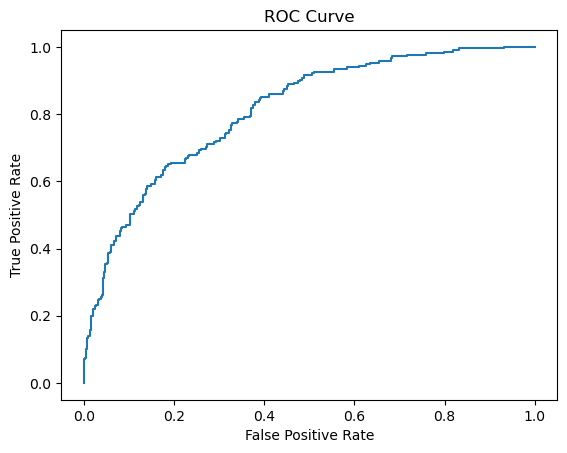

AUC Score: 0.8110975112199102

 ================= test =================


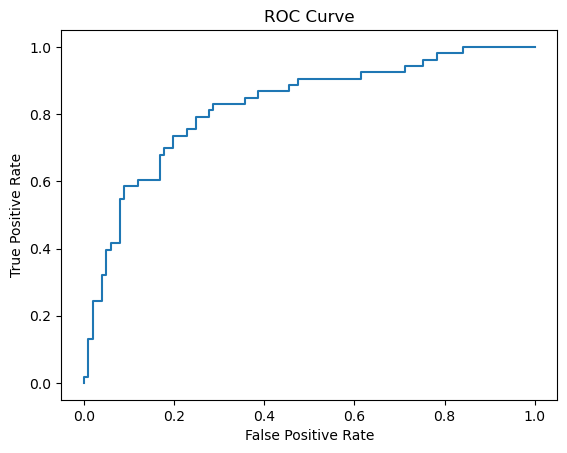

AUC Score: 0.823463478423314


In [114]:
from sklearn.metrics import roc_curve, roc_auc_score

print("================= train =================")
y_prob = model.predict_proba(x_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_train, y_prob))



print("\n ================= test =================")
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, y_prob))


In [106]:
#    Interpret the coefficients of the model.

print("Intercept (b0):", model.intercept_)
print("\nCoefficients (b1...bn):")
coef_df = pd.DataFrame({
    'Feature': x_scaled.columns,
    'Coefficient': model.coef_[0]
})
print("\nCoefficients:",coef_df)

Intercept (b0): [-0.86598936]

Coefficients (b1...bn):

Coefficients:                     Feature  Coefficient
0               Pregnancies     0.360005
1                   Glucose     1.243697
2             BloodPressure    -0.029700
3             SkinThickness     0.002022
4                   Insulin    -0.122839
5                       BMI     0.630291
6  DiabetesPedigreeFunction     0.399347
7                       Age     0.191459


In [ ]:
#           IMPLEMENTATION IN STREAMLIT
'''


import joblib

# Save your trained model and scaler
joblib.dump(best_model,"diabetes_model.pkl")
joblib.dump(ss,"scaler.pkl")

print("Model and Scaler saved successfully!")

In [ ]:
#   app.py
'''
import streamlit as st
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load("diabetes_model.pkl")
scaler = joblib.load("scaler.pkl")

# App title
st.title("🩺 Diabetes Prediction App")
st.write("Enter the patient details below to predict diabetes status:")

# Input fields
Pregnancies = st.number_input("Pregnancies", min_value=0, step=1)
Glucose = st.number_input("Glucose", min_value=0)
BloodPressure = st.number_input("Blood Pressure", min_value=0)
SkinThickness = st.number_input("Skin Thickness", min_value=0)
Insulin = st.number_input("Insulin", min_value=0)
BMI = st.number_input("BMI", min_value=0.0)
DiabetesPedigreeFunction = st.number_input("Diabetes Pedigree Function", min_value=0.0)
Age = st.number_input("Age", min_value=0, step=1)

# Prepare data for model
input_data = pd.DataFrame([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]],
                          columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

# Scale the input
scaled_data = scaler.transform(input_data)

# Prediction
import streamlit as st
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load("diabetes_model.pkl")
scaler = joblib.load("scaler.pkl")

# App title
st.title("🩺 Diabetes Prediction App")
st.write("Enter the patient details below to predict diabetes status:")

# Input fields
Pregnancies = st.number_input("Pregnancies", min_value=0, step=1)
Glucose = st.number_input("Glucose", min_value=0)
BloodPressure = st.number_input("Blood Pressure", min_value=0)
SkinThickness = st.number_input("Skin Thickness", min_value=0)
Insulin = st.number_input("Insulin", min_value=0)
BMI = st.number_input("BMI", min_value=0.0)
DiabetesPedigreeFunction = st.number_input("Diabetes Pedigree Function", min_value=0.0)
Age = st.number_input("Age", min_value=0, step=1)

# Prepare data for model
input_data = pd.DataFrame([[Pregnancies, Glucose, BloodPressure, SkinThickness,
                            Insulin, BMI, DiabetesPedigreeFunction, Age]],
                          columns=["Pregnancies","Glucose","BloodPressure",
                                   "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

# Scale the input
scaled_data = scaler.transform(input_data)

# Prediction

if st.button("Predict"):
    prediction = model.predict(scaled_data)[0]
    result = "Diabetic" if prediction == 1 else "Non-Diabetic"
    st.success(f"Prediction: **{result}**")